---
title: Airlines and Airports
exports:
  - format: pdf
    template: arxiv_nips
    output: pdf_builds/airlines_airports.pdf
---

This notebook contains analysis on how airlines and airports compare wrt. delays, and how they cluster into groups.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import linkage, dendrogram

from helper_functions import (group_data_reliability, 
                                show_full_names, 
                                sort_on_time_rate, 
                                on_time_summary_table, 
                                on_time_bar_chart, 
                                plot_corr_matrix, 
                                group_data_clustering, 
                                hierarchical_clustering)

### Loading the Data

In [2]:
# Load data
airlines = pd.read_csv("data/airlines.csv")
airports = pd.read_csv("data/airports.csv")
flights = pd.read_csv("data/filtered_flights.csv")

### Most Reliable Airline

This section explores which of the airlines in the dataset is the most reliable, i.e., which airline has the fewest delays as well as the shortest average delays.

In [3]:
# Defining "on time" threshold as 15 minutes
on_time_threshold = 15

# Creating new variables saying whether a flight was delayed on departure and arrival, respectively
flights["dep_on_time"] = (flights["DEPARTURE_DELAY"] <= on_time_threshold).astype(int)
flights["arr_on_time"] = (flights["ARRIVAL_DELAY"] <= on_time_threshold).astype(int)

In [4]:
# Aggregating by airline
summary_performance_airline = group_data_reliability(flights, "AIRLINE")

In [5]:
# Showing full airline names instead of abbreviations
summary_performance_airline = show_full_names(summary_performance_airline, airlines, "AIRLINE", ["IATA_CODE"])

In [6]:
# Sorting the airlines on highest on-time rate, then lowest average delay
summary_performance_airline = sort_on_time_rate(summary_performance_airline)

Below is a table showing on time arrivals and departures as well as average arrival and departure delays.

In [7]:
# Showing the ranked airlines in a table
on_time_summary_table(summary_performance_airline, "AIRLINE", 
                      "Airline", "figures/df_ranked_airlines.png")

,Airline,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,Alaska Airlines Inc.,33201,0.881600,0.904973,-0.750732,0.593019
1,US Airways Inc.,11361,0.856527,0.893759,2.025438,3.224452
2,Delta Air Lines Inc.,47603,0.847951,0.840451,1.883597,8.364393
3,American Airlines Inc.,65055,0.839413,0.853324,1.818355,7.165833
4,United Air Lines Inc.,88315,0.813644,0.783978,4.235110,13.173306
5,Virgin America,29651,0.808506,0.819197,5.750772,9.171083
6,Skywest Airlines Inc.,134817,0.791169,0.803867,6.818962,8.588723
7,JetBlue Airways,20970,0.789080,0.789938,5.313444,10.661939
8,Southwest Airlines Co.,196907,0.785838,0.768916,6.720453,11.009291
9,Hawaiian Airlines Inc.,4299,0.773901,0.920679,6.508490,3.600605


The same thing can be showed in a bar plot, which is easier to interpret and compare across airlines.

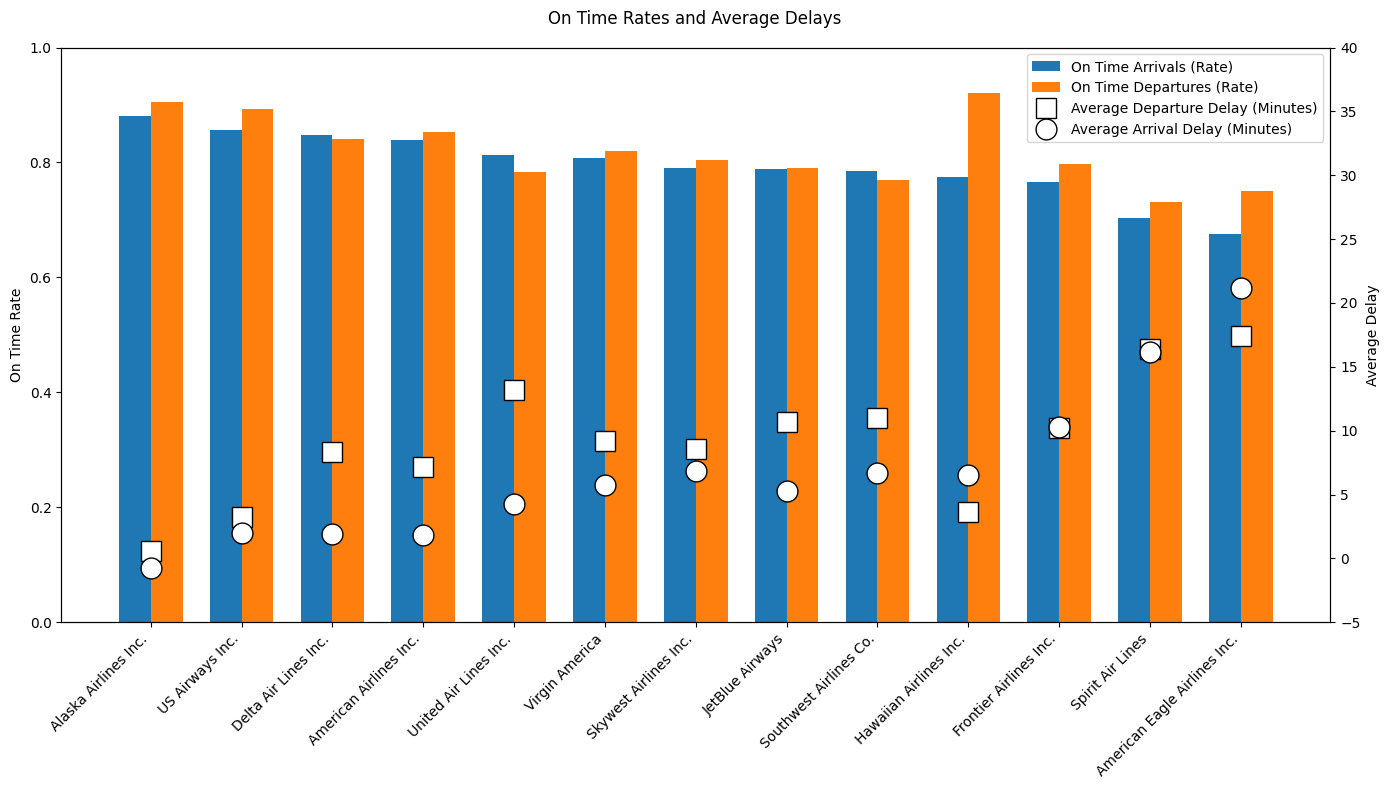

In [8]:
# Showing the ranked airlines in a bar chart
on_time_bar_chart("AIRLINE", summary_performance_airline, "figures/reliable_airlines.png")

Alaska Airlines stands out as the most reliable carrier in the dataset, with the highest on time arrival and departure rates and even a slightly negative average arrival delay, indicating flights arrive early. US Airways, Delta Air Lines, and American Airlines also perform well, showing high on time rates combined with relatively low average delays. In contrast, American Eagle Airlines and Spirit Airlines rank lowest, showing both poor on time performance and the largest average delays. Large airlines like United Air Lines and Southwest Airlines operate many flights but suffer from high delays, telling us that scale may come at the cost of punctuality. Overall, the table and plot show big performance differences across airlines, with Alaska Airlines being the clear benchmark.

### Most Reliable Airport

Below, the same is done for airports, as we did for airlines.

In [9]:
# Aggregating by origin airport
summary_performance_airport = group_data_reliability(flights, "ORIGIN_AIRPORT")

In [10]:
# Showing full airport names instead of abbreviations
summary_performance_airport = show_full_names(summary_performance_airport, airports, "ORIGIN_AIRPORT", 
                                            ["IATA_CODE", "CITY", "STATE", "COUNTRY", "LATITUDE", "LONGITUDE"])

In [11]:
# Sorting the airports on highest on-time rate, then lowest average delay
summary_performance_airport = sort_on_time_rate(summary_performance_airport)

Below is a table showing on time arrivals and departures as well as average arrival and departure delays.

In [12]:
# Showing the ranked airlines in a table
on_time_summary_table(summary_performance_airport, "AIRPORT", 
                      "Airport", "figures/df_ranked_airports.png")

,Airport,Total Flights,On Time Arrivals (Rate),On Time Departures (Rate),Average Arrival Delay (Minutes),Average Departure Delay (Minutes)
0,John Wayne Airport (Orange County Airport),36986,0.852052,0.843400,1.655579,6.511605
1,Bob Hope Airport (Hollywood Burbank Airport),18838,0.845897,0.844516,3.142981,5.978842
2,McClellan-Palomar Airport,641,0.839314,0.868955,5.240446,5.353503
3,Redding Municipal Airport,725,0.838621,0.809655,0.191218,6.471671
4,Meadows Field,2626,0.838157,0.841203,3.502126,5.812138
5,Ontario International Airport,17928,0.830154,0.820281,4.139963,8.311216
6,Santa Maria Public Airport (Capt G. Allan Hanc...,663,0.828054,0.841629,5.880368,8.843558
7,San Diego International Airport (Lindbergh Field),69915,0.822570,0.819095,3.328988,8.314869
8,Palm Springs International Airport,8957,0.822039,0.828737,6.007783,7.961985
9,Sacramento International Airport,37093,0.821395,0.828135,5.451832,8.032538


The same thing can be showed in a bar plot, which is easier to interpret and compare across airports.

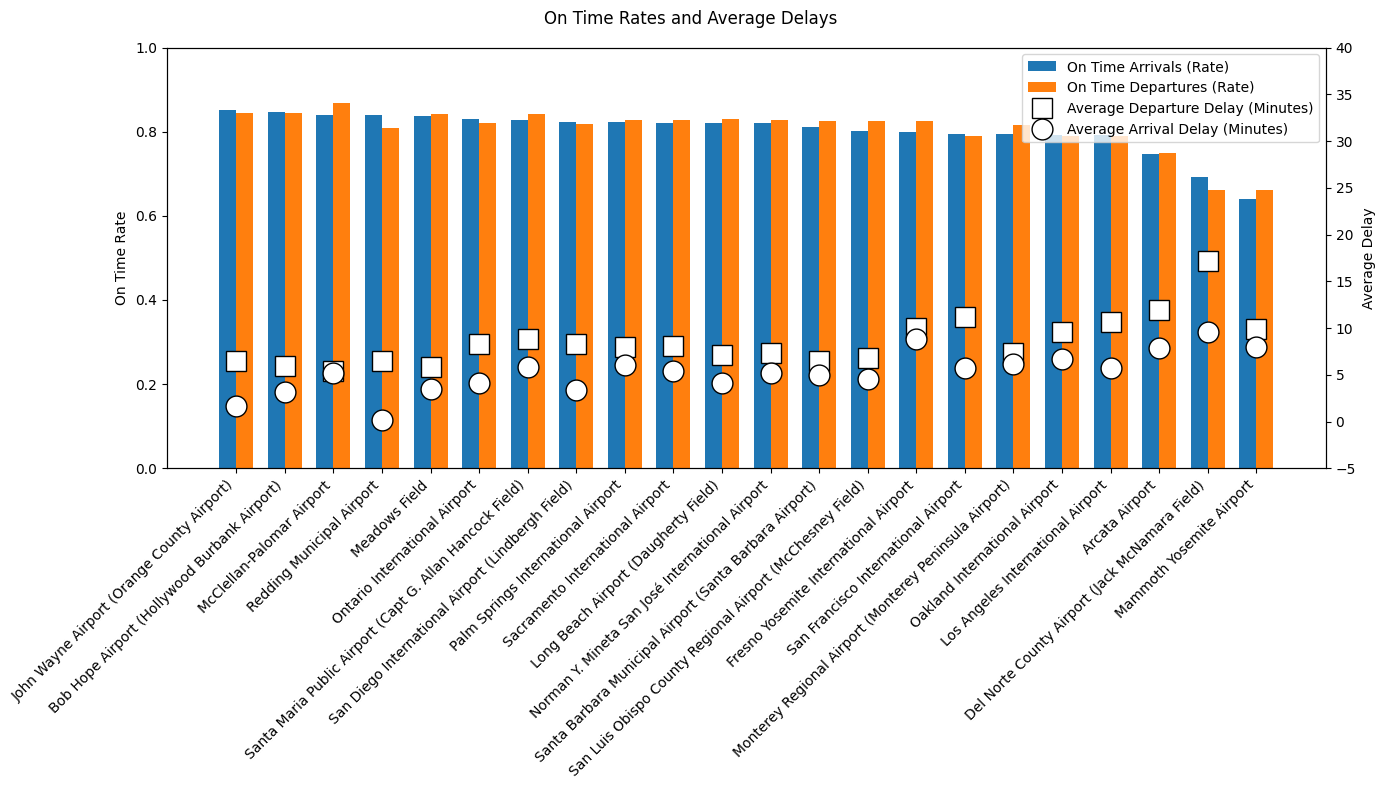

In [13]:
# Showing the ranked airports in a bar chart
on_time_bar_chart("AIRPORT", summary_performance_airport, "figures/reliable_airports.png")

John Wayne Airport is the most reliable airport, with the highest on time arrival and departure rates and relatively low average delays. Bob Hope Airport, McClellan–Palomar Airport, and Redding Municipal Airport also perform strongly, showing efficient operations despite big differences in the flight volume of the airports. In contrast, Mammoth Yosemite Airport, Del Norte County Airport, and Arcata Airport rank the lowest, with substantially worse punctuality and the highest average delays, suggesting capacity-related challenges at smaller airports. Larger airports like Los Angeles International Airport and San Francisco International Airport handle very high traffic volumes but show worse punctuality. In summary, airport performance varies a lot, and this is not just explained by airport size.

### Clustering

This section explores how the airlines and airports form natural clusters with respect to delays.  

We start by showing a correlation matrix between all the variables in the dataset.

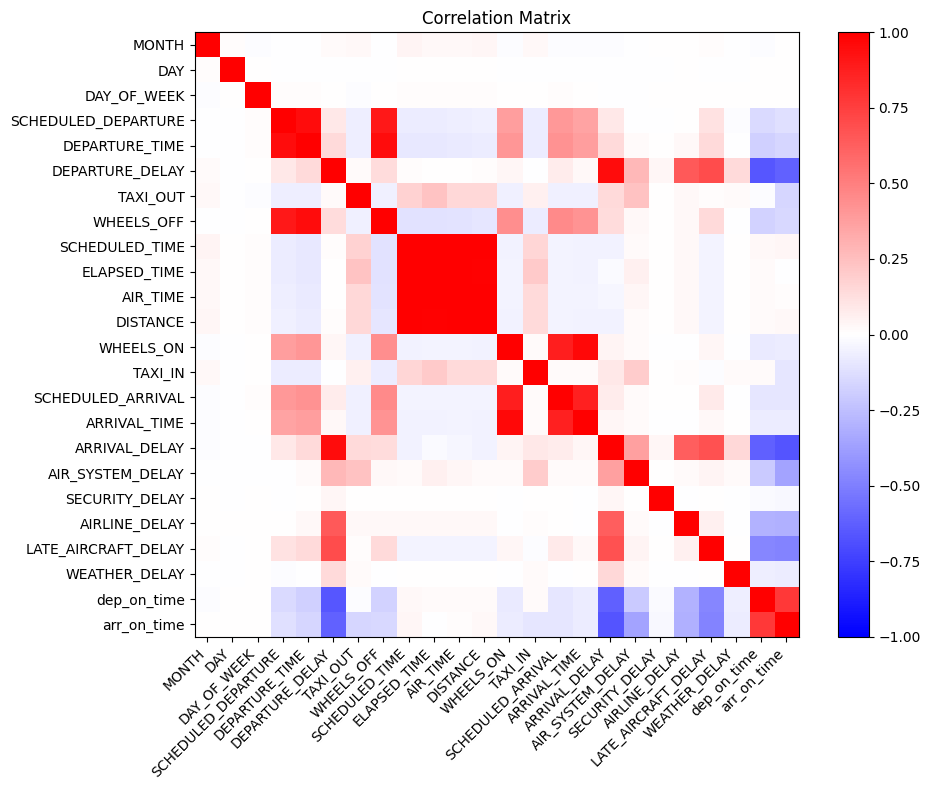

In [14]:
# Creating a correlation matrix, and dropping the categorical variables, where we also
# drop FLIGHT_NUMBER and CANCELLED, as they appear to be numerical, but really are categorical
corr_matrix = flights.drop(columns=["FLIGHT_NUMBER", "CANCELLED"]).corr(numeric_only=True)

# Plotting the correlation matrix
plot_corr_matrix(corr_matrix, "Correlation Matrix", "figures/correlation_full.png")

We see that a lot of the variables are correlated, and that some are even perfectly correlated. Because the hierarchical clustering we are about to do is distorted if many variables are highly correlated, we need to get rid of some of them. Also, we want to get rid of variables that do not show information about delays, as the goal is to determine clusters wrt. delays.

In [15]:
drop_variables = []

# The two variables are almost perfectly correlated, so we take the difference instead
flights["departure_diff"] = flights["DEPARTURE_TIME"] - flights["SCHEDULED_DEPARTURE"]
# flights["arrival_diff"] = flights["ARRIVAL_TIME"] - flights["SCHEDULED_ARRIVAL"] # Variable already in dataset
flights["airtime_diff"] = flights["AIR_TIME"] - flights["SCHEDULED_TIME"]
drop_variables.extend(["DEPARTURE_TIME", "SCHEDULED_DEPARTURE"])
drop_variables.extend(["ARRIVAL_TIME", "SCHEDULED_ARRIVAL"])
drop_variables.extend(["AIR_TIME", "SCHEDULED_TIME"])

# Almost perfectly correlated with the corresponding arrival variable
drop_variables.extend(["DEPARTURE_DELAY"])

# Binary variables highly correlated with other variables
drop_variables.extend(["dep_on_time", "arr_on_time"])

# Sum of other variables in the dataset
drop_variables.extend(["ELAPSED_TIME"])

# Too high correlation with other similar variables
drop_variables.extend(["AIRLINE_DELAY", "LATE_AIRCRAFT_DELAY"])

# We also drop variables not showing information about delays, because we want to see
# how the airlines and airports cluster wrt. delays, and not length of flights, which day
# of the month they usually fly etc.
drop_variables.extend(["MONTH", "DAY", "DAY_OF_WEEK", "WHEELS_ON", "WHEELS_OFF", "DISTANCE"])

# Dropping the variables
flights = flights.drop(columns=drop_variables)

Like we did in the tables further up, we display the actual names of the airlines and airports in the data, instead of the abbreviations.

In [16]:
# Showing full airline names instead of abbreviations
flights = show_full_names(flights, airlines, "AIRLINE", ["IATA_CODE"])

# Showing full airport names instead of abbreviations
flights = show_full_names(flights, airports, "ORIGIN_AIRPORT", 
                          ["IATA_CODE", "CITY", "STATE", "COUNTRY", "LATITUDE", "LONGITUDE"])

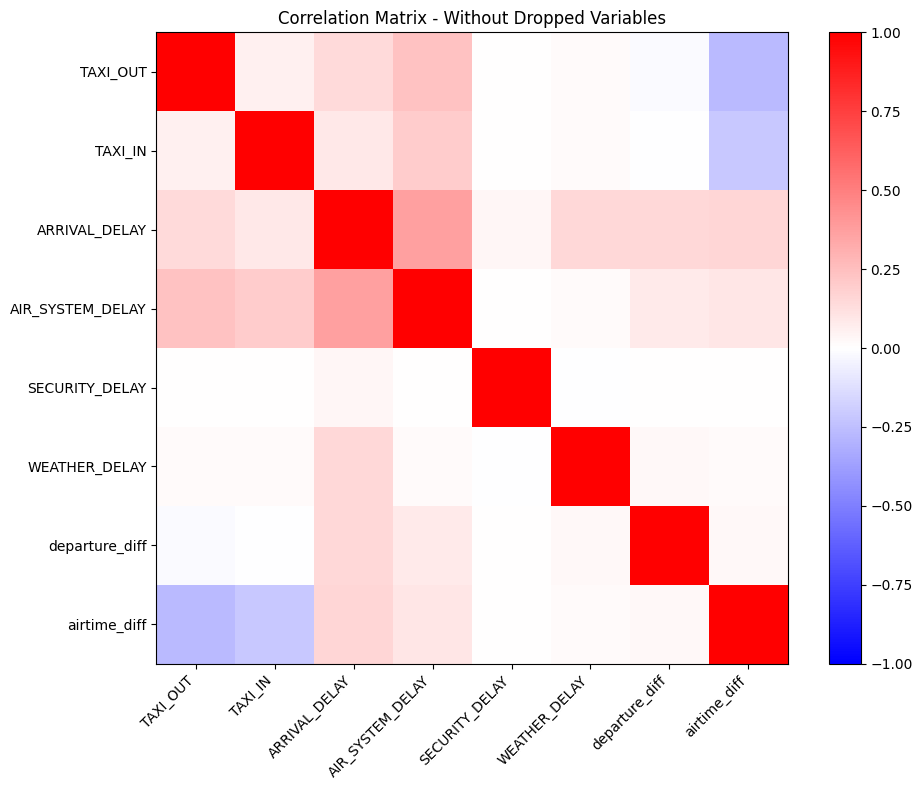

In [17]:
# Creating a new correlation matrix without the dropped variables
corr_matrix_new = flights.drop(columns=["FLIGHT_NUMBER", "CANCELLED"]).corr(numeric_only=True)

# Plotting the correlation matrix
plot_corr_matrix(corr_matrix_new, "Correlation Matrix - Without Dropped Variables", 
                 "figures/correlation_partial.png")

It is clear that the correlations between the remaining variables are now not as high as some of them were before. We check what the highest absolute correlation between two variables are below.

In [18]:
# Highest absolute correlation coefficient in the remaining numerical variables
correlations = corr_matrix_new.values.copy()
np.fill_diagonal(correlations, 0)
np.nanmax(np.abs(correlations))

np.float64(0.3709724569754167)

A rule of thumb for an acceptable absolute correlation when doing hierarchical clustering is 0.5, which the maximum absolute correlation in our data is below, at 0.371.  

We now define the columns we want to keep in the hierarchical clustering, getting rid of categorical variables. Then we group the data on airlines and airports, respectively, so that we can perform the clustering analysis on these summary datasets. We aggregate on the mean, standard deviation, and the 10% and 90% quantiles of each of the remaining variables, to obtain an informative summary of both central behavior and tail behavior for each airline and airport. Lastly, the hierarchical clustering is performed and the dendrograms shown.

In [19]:
# Defining the variables to keep
keep_cols = [col for col in flights.columns.tolist() if col not in ["AIRLINE_x", 
                                                                 "AIRLINE_y", 
                                                                 "FLIGHT_NUMBER", 
                                                                 "TAIL_NUMBER", 
                                                                 "ORIGIN_AIRPORT", 
                                                                 "AIRPORT", 
                                                                 "DESTINATION_AIRPORT", 
                                                                 "CANCELLED"]]

In [20]:
# Grouping by airline, and aggregating the mean, standard deviation, 
# and the 10% and 90% quantiles of each of the remaining variables
airline_summary_full = group_data_clustering(flights, "AIRLINE_y", keep_cols)

# Grouping by airport, and aggregating the mean, standard deviation, 
# and the 10% and 90% quantiles of each of the remaining variables
airport_summary_full = group_data_clustering(flights, "AIRPORT", keep_cols)

Performing the hierarchical clustering and plotting the dendrograms.

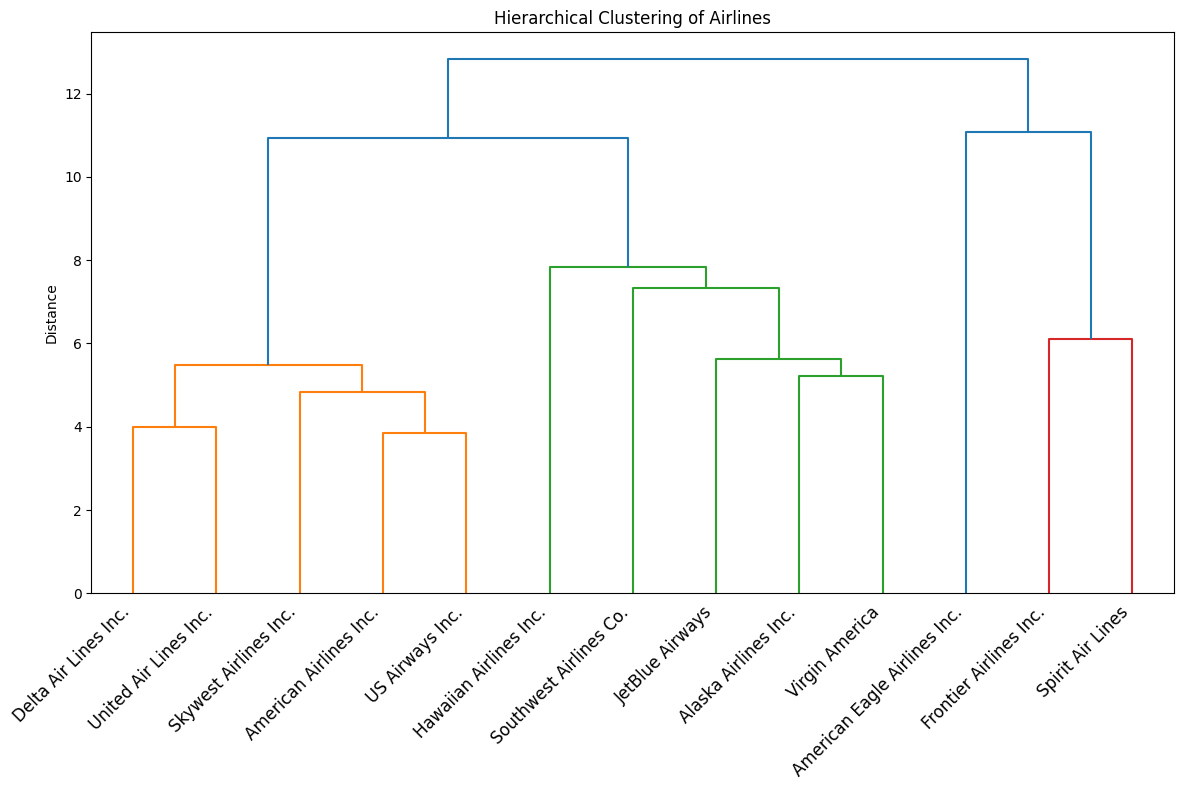

In [21]:
# Performing the hierarchical clustering and plotting the dendrogram for the airlines
hierarchical_clustering(
    airline_summary_full.values,
    airline_summary_full.index.astype(str).values,
    "Hierarchical Clustering of Airlines",
    "figures/clustering_airlines.png"
)

The dendrogram for the airlines shows three main performance-based clusters among the airlines, and one airline that stands out from the rest. Delta, United, SkyWest, American, and US Airways form a cluster, indicating very similar behavior in terms of delays and reliability. Hawaiian, Southwest, JetBlue, Alaska, and Virgin America group into a second cluster, suggesting an internally consistent performance profile that differs from the first group. Frontier and Spirit clearly separate into their own cluster, showing that these two airlines have substantially different performance characteristics compared with the other carriers. Lastly, American Eagle is in its own bucket, showing that it is not that similar with respect to delays to the other airlines. In summary, the dendrogram shows strong similarity with respect to delays among traditional airline carriers, moderate similarity among large low-cost carriers, and a distinct outlier group consisting of very low-cost airlines.

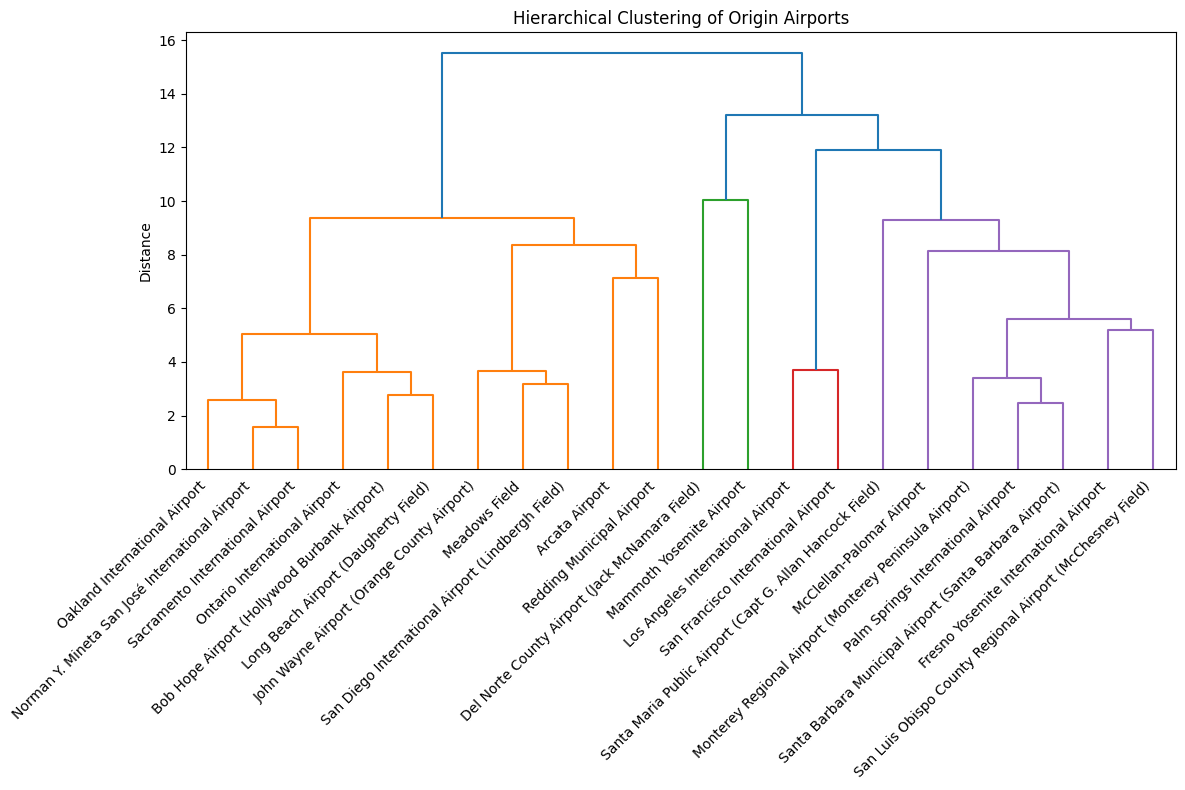

In [22]:
# Performing the hierarchical clustering and plotting the dendrogram for the airports
hierarchical_clustering(
    airport_summary_full.values,
    airport_summary_full.index.astype(str).values,
    "Hierarchical Clustering of Origin Airports",
    "figures/clustering_airports.png"
)

The dendrogram for the airports shows that large hubs like Oakland, San José, Sacramento, Ontario, Bob Hope, Long Beach, John Wayne, Meadows Field, San Diego, Arcata, and Redding group together, indicating similar operational behavior typical of high-traffic airports (with a few outliers present, that you would maybe not expect to have the same delay characteristics). A second, clearly separated cluster is formed by the Los Angeles and San Francisco airports, which stand out as extreme hubs with distinctly different delay characteristics compared to all other airports. The two smaller regional airports Del Norte and Mammoth Yosemite form another distinct group, showing structurally different and more unstable performance patterns driven by low traffic volumes. Finally, we have a cluster with the medium-sized regional airports Santa Maria, McClellan-Palomar, Monterey, Palm Springs, Santa Barbara, Fresno, and San Luis Obispo. In summary, the dendrogram shows that airport performance is highly structured by the size with major hubs, regional airports, and small local airports forming very distinct groups.